# Linear Regression

Based on Chapter 5 from *Python for Data Science Handbook*, by Jake VanderPlas.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

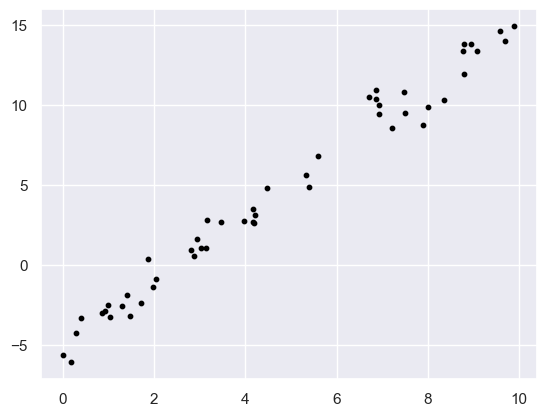

In [2]:
rng = np.random.RandomState(1)

x = 10 * rng.rand(50)

y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y, s=10, color='black');

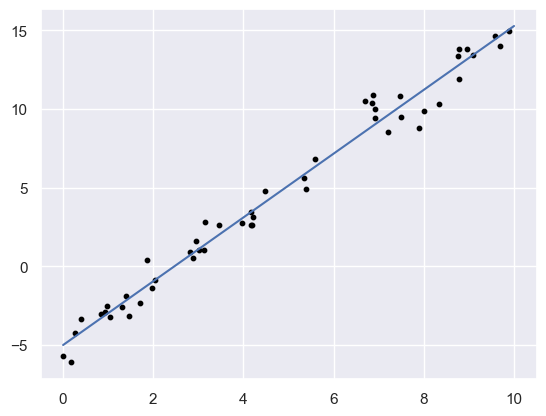

In [3]:
from sklearn.linear_model import LinearRegression

# Initialize a Linear Regression model with the fit_intercept parameter set to True.
model = LinearRegression(fit_intercept=True)

# Fit the model to the data, with x reshaped to be a 2D array by adding a new axis, and y as the target variable.
model.fit(x[:, np.newaxis], y)

# Generate a range of x values for prediction, from 0 to 10 with 1000 points.
xfit = np.linspace(0, 10, 1000)

# Predict y values using the fitted model, with xfit reshaped to be a 2D array by adding a new axis.
yfit = model.predict(xfit[:, np.newaxis])

# Scatter plot of the original data points (x, y).
plt.scatter(x, y, s=10, color='black')

# Plot the linear regression line using the xfit and yfit values.
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [5]:
rng = np.random.RandomState(1)

# Multidimensional linear model
X = 10 * rng.rand(100, 3)            # The shape of the array is 100 rows by 3 columns
y = 0.5 + np.dot(X, [1.5, -2., 1.])  # Hyper-plane by the vector [1.5, -2., 1.]

model.fit(X, y)   # Fit the model to the data

print(model.intercept_)
print(model.coef_)

0.5000000000000084
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# Create a 1D numpy array with values 2, 3, and 4.
x = np.array([2, 3, 4])

# Initialize a PolynomialFeatures object with degree 3 and without including the bias term.
poly = PolynomialFeatures(3, include_bias=False)

# Transform the 1D array into a 2D array where each element is expanded to polynomial features of degree 3.
# The x[:, None] converts the 1D array into a 2D array with a single column.
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

The cleanest way to accomplish this is to use a pipeline.
    
Let's make a 7th-degree polynomial model in this way:

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4 + a_5 x^5 + a_6 x^6 + a_7 x^7
$$

In [7]:
from sklearn.pipeline import make_pipeline

# Create a pipeline that first applies polynomial feature expansion of degree 7,
# followed by fitting a LinearRegression model to the expanded features.
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

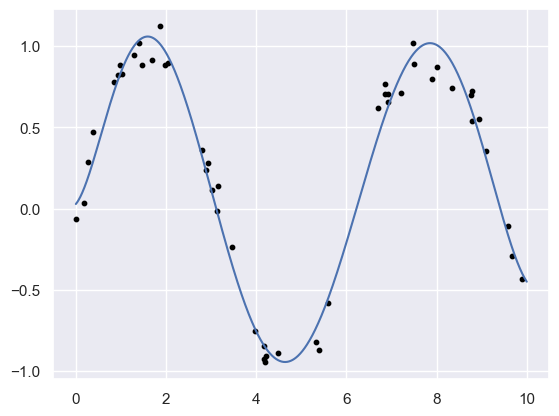

In [8]:
# Initialize a random number generator with seed 1 for reproducibility.
rng = np.random.RandomState(1)

# Generate 50 random values uniformly distributed between 0 and 10.
x = 10 * rng.rand(50)

# Generate target values by applying a sine function to x and adding some random noise.
y = np.sin(x) + 0.1 * rng.randn(50)

# Fit the polynomial regression model to the data, expanding x to polynomial features of degree 7.
poly_model.fit(x[:, np.newaxis], y)

# Generate a range of x values for plotting the model's predictions.
xfit = np.linspace(0, 10, 1000)

# Predict the target values using the fitted model for the range of x values.
yfit = poly_model.predict(xfit[:, np.newaxis])

# Plot the original data points as a scatter plot.
plt.scatter(x, y, s=10, color='black')

# Plot the predicted values from the polynomial regression model as a line plot.
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

<left>
    <img src="images/05.06-gaussian-basis.png" width="700" />
</left>

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

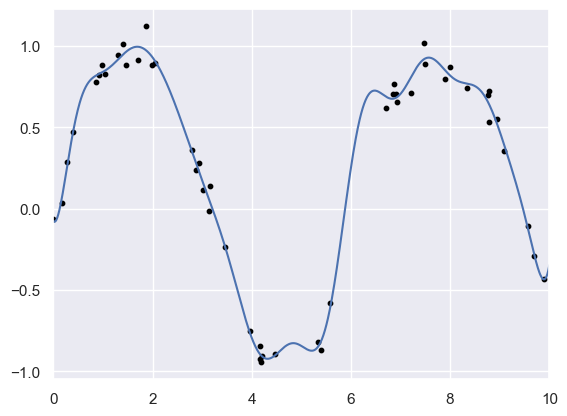

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):        # Initialize the number of Gaussian features and width scaling factor
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    
    def _gauss_basis(x, y, width, axis=None):       # Calculate the Gaussian basis function for given inputs
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):                       # Fit the Gaussian feature transformer by computing centers and widths
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):                         # Transform input data into Gaussian features based on computed centers and width
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

# Create a pipeline with the custom Gaussian feature transformer and a linear regression model
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())

# Fit the pipeline to the training data
gauss_model.fit(x[:, np.newaxis], y)

# Predict the output using the fitted model
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y, s=10, color='black')
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting. For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

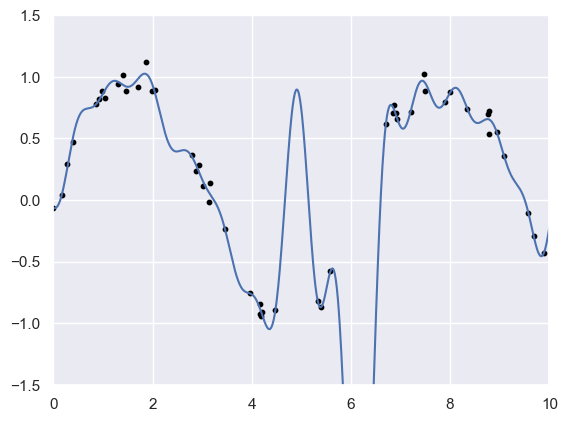

In [10]:
# Create a machine learning pipeline with two steps:
model = make_pipeline(GaussianFeatures(30),    # 1. GaussianFeatures(30) transforms the input data to include 30 Gaussian features.
                      LinearRegression())      # 2. LinearRegression() fits a linear regression model to these Gaussian features.

# Fit the model using the input data x and target values y.
model.fit(x[:, np.newaxis], y)

# Scatter plot of the original data points with black markers.
plt.scatter(x, y, s=10, color='black')

# Plot the predictions of the model over a range of x values (xfit).
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))   # The model's predictions are made using xfit, reshaped to match the input requirements.

# Set the x-axis limits from 0 to 10.
plt.xlim(0, 10)

# Set the y-axis limits from -1.5 to 1.5.
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data. We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

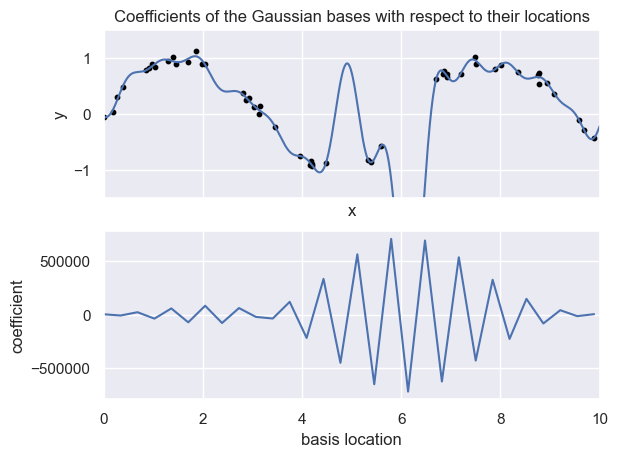

In [11]:
def basis_plot(model, title=None):
    
    # Create a figure with two subplots arranged vertically
    fig, ax = plt.subplots(2, sharex=True)
    
    # Fit the model on the training data (x and y)
    model.fit(x[:, np.newaxis], y)
    
    # Plot the training data and the model's predictions on the first subplot
    ax[0].scatter(x, y, s=10, color='black')              # Scatter plot of the original data
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))  # Line plot of the model's predictions
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))   # Set labels and y-axis limits
    
    # If a title is provided, set it for the first subplot
    if title:
        ax[0].set_title(title)

    # Plot the basis functions' centers and the coefficients on the second subplot
    ax[1].plot(model.steps[0][1].centers_,  # Basis function centers
               model.steps[1][1].coef_)     # Coefficients of the basis functions
    ax[1].set(xlabel='basis location',      # X-axis label for the second subplot
              ylabel='coefficient',         # Y-axis label for the second subplot
              xlim=(0, 10))                 # Set x-axis limits

# Create a pipeline with GaussianFeatures and LinearRegression, and fit it
model = make_pipeline(GaussianFeatures(30), LinearRegression())

# Call the basis_plot function with the fitted model
basis_plot(model, title='Coefficients of the Gaussian bases with respect to their locations')  

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

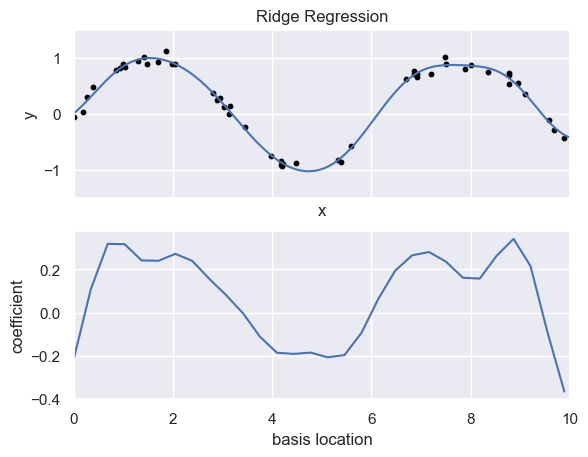

In [12]:
from sklearn.linear_model import Ridge

# Create a pipeline with GaussianFeatures and Ridge, and fit it
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))    # Ridge discourages the model from fitting the training data too closely 
                                                                 # and helps prevent overfitting.  

# Call the basis_plot function with the fitted model
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

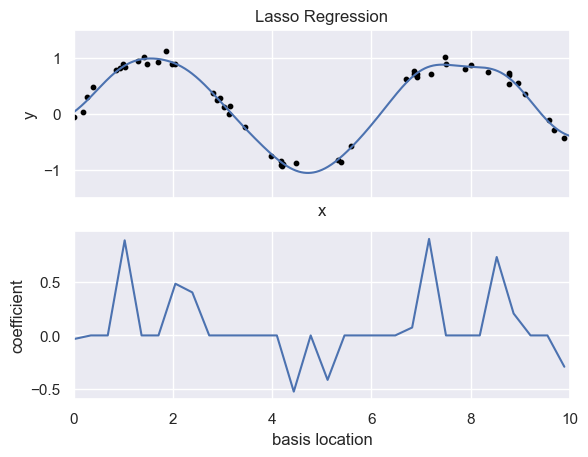

In [13]:
from sklearn.linear_model import Lasso

# Create a pipeline with GaussianFeatures and Lasso, and fit it
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=10000))     # Increase the number of iterations allowed for convergence

# Call the basis_plot function with the fitted model
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation.

# Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (I used station ID USW00024233) and we can easily use Pandas to join the two data sources.
We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

In particular, this is an example of how the tools of Scikit-Learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.
As discussed previously, this is not a standard approach within machine learning, but such interpretation is possible for some models.

Let's start by loading the two datasets, indexing by date:

In [14]:
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

counts.head(3)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0


In [15]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102947 entries, 2012-10-02 13:00:00 to 2024-06-30 23:00:00
Data columns (total 3 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Fremont Bridge Sidewalks, south of N 34th St                        102919 non-null  float64
 1   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  102919 non-null  float64
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


Next we will compute the total daily bicycle traffic, and put this in its own dataframe:

In [16]:
# Resample the data to a daily frequency and sum up the counts for each day
daily = counts.resample('d').sum()

daily.head(3)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02,1938.0,1165.0,773.0
2012-10-03,3521.0,1761.0,1760.0
2012-10-04,3475.0,1767.0,1708.0


In [17]:
# Add a new column 'Total' that contains the sum of counts across all columns for each day
daily['Total'] = daily.sum(axis=1)

# Remove other columns
daily = daily[['Total']] 

daily.head()

,Total
Date,
2012-10-02,3876.0
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0


We saw previously that the patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week:

In [18]:
# Define the days of the week as a list
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Iterate through each day of the week (0 = Monday, 6 = Sunday)
for i in range(7):
    # Create a new column for each day, 1.0 if the day matches the corresponding day of the week, otherwise 0.0
    daily.loc[:, days[i]] = (daily.index.dayofweek == i).astype(float)

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar

# Initialize the USFederalHolidayCalendar to obtain holiday dates
cal = USFederalHolidayCalendar()

# Get the holidays between the years 2012 and 2016
holidays = cal.holidays('2012', '2016')

# Join the holiday information with the 'daily' DataFrame
# Creates a new column 'holiday' where holidays have a value of 1
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))

# Replace NaN values in the 'holiday' column with 0, using .loc to ensure no chained assignment issues
daily.loc[:, 'holiday'] = daily['holiday'].fillna(0)

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

In [20]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    # Calculate the number of days since December 21, 2000
    days = (date - pd.Timestamp(2000, 12, 21)).days
    
    # Calculate the approximate hours of daylight
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    # Clip the m value to avoid domain errors in arccos, and calculate daylight hours
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

# Apply the hours_of_daylight function to each date in the daily DataFrame index
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056


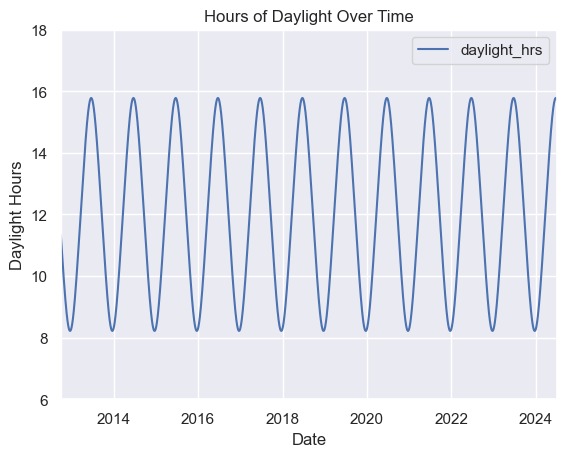

In [21]:
# Plot the computed daylight hours
daily[['daylight_hrs']].plot()
plt.ylim(6, 18)
plt.title('Hours of Daylight Over Time')
plt.xlabel('Date')
plt.ylabel('Daylight Hours')
plt.show()

We can also add the average temperature and total precipitation to the data. In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):



In [22]:
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

weather.head(3)

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [23]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1340 entries, 2012-01-01 to 2015-09-01
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       1340 non-null   object
 1   STATION_NAME  1340 non-null   object
 2   PRCP          1340 non-null   int64 
 3   SNWD          1340 non-null   int64 
 4   SNOW          1340 non-null   int64 
 5   TMAX          1340 non-null   int64 
 6   TMIN          1340 non-null   int64 
 7   AWND          1340 non-null   int64 
 8   WDF2          1340 non-null   int64 
 9   WDF5          1340 non-null   int64 
 10  WSF2          1340 non-null   int64 
 11  WSF5          1340 non-null   int64 
 12  FMTM          1340 non-null   int64 
 13  WT14          1340 non-null   int64 
 14  WT01          1340 non-null   int64 
 15  WT17          1340 non-null   int64 
 16  WT05          1340 non-null   int64 
 17  WT02          1340 non-null   int64 
 18  WT22          1340 non-null   

In [24]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

# Join the weather data with the daily bicycle count data
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,13.90,1.0
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0


Finally, let's add a counter that increases from day 1, and measures how many years have passed. This will let us measure any observed annual increase or decrease in daily crossings:

In [25]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,13.90,1.0,0.000000
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.002740
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.005479
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.008219
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.010959


With this in place, we can choose the columns to use, and fit a linear regression model to our data. We will set `fit_intercept = False`, because the daily flags essentially operate as their own day-specific intercepts:



In [26]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

# Define the column names to be used as features for the regression model
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']

# Select the features (X) and the target variable (y) from the daily DataFrame
X = daily[column_names]  # Features: days of the week, holiday, daylight hours, etc.
y = daily['Total']       # Target: total bicycle counts

# Create a linear regression model without an intercept (fit_intercept=False)
model = LinearRegression(fit_intercept=False)

# Fit the model to the data (X and y)
model.fit(X, y)

# Use the fitted model to predict the total bicycle counts
daily['predicted'] = model.predict(X)

Finally, we can compare the total and predicted bicycle traffic visually:



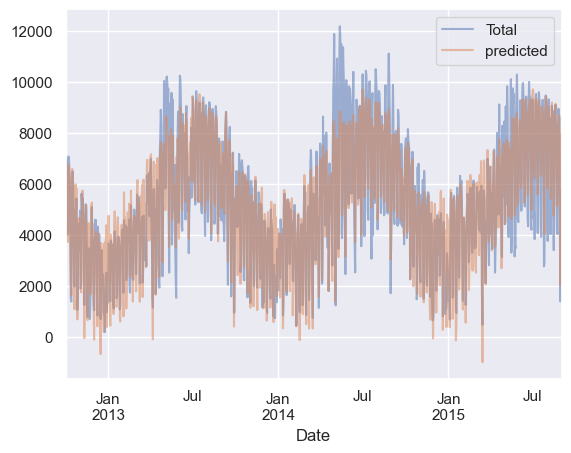

In [27]:
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures). Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [28]:
# Create a Pandas Series to store the coefficients of the linear regression model
params = pd.Series(model.coef_, index=X.columns)
params

Mon              995.664261
Tue             1185.010820
Wed             1171.329426
Thu              950.462501
Fri              341.655551
Sat            -2220.310481
Sun            -2280.932173
holiday        -2370.131538
daylight_hrs     259.066376
PRCP           -1329.814620
dry day         1088.251359
Temp (C)         129.633225
annual            60.954039
dtype: float64

These numbers are difficult to interpret without some measure of their uncertainty. We can compute these uncertainties quickly using bootstrap resamplings of the data:

In [29]:
from sklearn.utils import resample

# Set the random seed for reproducibility
np.random.seed(1)

# Calculate the standard deviation of the model's coefficients over 1000 resamples of the data
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

With these errors estimated, let's again look at the results:

In [30]:
# Print a DataFrame showing the estimated effects (model coefficients) and their associated errors

print(pd.DataFrame({'effect': params.round(0),  # 'effect' column: The coefficients of the features rounded to the nearest whole number
                    'error': err.round(0)}))    # 'error' column: The standard deviations (errors) of the coefficients, 
                                                # also rounded to the nearest whole number

              effect  error
Mon            996.0  173.0
Tue           1185.0  169.0
Wed           1171.0  166.0
Thu            950.0  163.0
Fri            342.0  159.0
Sat          -2220.0  161.0
Sun          -2281.0  163.0
holiday      -2370.0  327.0
daylight_hrs   259.0   17.0
PRCP         -1330.0  126.0
dry day       1088.0   68.0
Temp (C)       130.0    7.0
annual          61.0   34.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).
These are all potentially interesting effects, and you now have the tools to begin exploring them if you wish!